---

<img src="./images/anchormen-logo.png" width="500">

---

# Basics Lab 3b: Data Munging with Pandas 

The two main data structures of Pandas are Series and DataFrames. We will first practice some simple data handling with each of these, before exploring some real world data.

This lab consists of the following sections:

- A: **Working with Series Objects**
- B: **Working with DataFrames Objects**
- C: **Exploring the Titanic Dataset**

Complete the exercises below. If you are having problems try to find a possible solution by looking at the pandas documentation: http://pandas.pydata.org/pandas-docs/stable/genindex.html


## Tips

- Press 'h' to show keyboard shortcuts in Jupyter Notebooks
- Use tab completion! When typing a command, press 'tab' to get a dropdown list of options
- Use the help() function to get help on a Python object

In [62]:
# Standard libraries
import pandas as pd 
import numpy as np

## A. Working with Series Objects

** Exercise: Create a series with the following values: 4, 8, -3, 2 **

In [63]:
# code
test=pd.Series([4, 8, -3,2]).values
test

array([ 4,  8, -3,  2])

** Exercise: Create a Series object out of the follwoing python dict**:
```
dict_data = {'Amsterdam': 35000, 'Utrecht': 71000, 'Den Haag': 16000, 'Maastricht': 5000} ```

In [64]:
dict_data = {'Amsterdam': 35000, 'Utrecht': 71000, 'Den Haag': 16000, 'Maastricht': 5000}
ser = pd.Series(data=dict_data, index=['Amsterdam', 'Utrecht', 'Den Haag', 'Maastricht'])
ser

Amsterdam     35000
Utrecht       71000
Den Haag      16000
Maastricht     5000
dtype: int64

## B. Working with DataFrame Objects

A DataFrame can be constructed from:

- a dict of lists of equal length, or
- a numpy array

** Exercise: Create a dataframe that corresponds to the image below: **

<img src="images/df1.png" width="200">

In [65]:
array = np.arange(50).reshape(10,5)
df = pd.DataFrame(data=array, columns=['zero', 'one', 'two','three','four'])
df

,zero,one,two,three,four
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24
5,25,26,27,28,29
6,30,31,32,33,34
7,35,36,37,38,39
8,40,41,42,43,44
9,45,46,47,48,49


**Exercise: Swap the rows and columns of the DataFrame you just created **

In [66]:
df.T

,0,1,2,3,4,5,6,7,8,9
zero,0,5,10,15,20,25,30,35,40,45
one,1,6,11,16,21,26,31,36,41,46
two,2,7,12,17,22,27,32,37,42,47
three,3,8,13,18,23,28,33,38,43,48
four,4,9,14,19,24,29,34,39,44,49



** Exercise: Create a DataFrame out of the python dict named dict_data **

In [67]:
dict_data = {'City': ['Amsterdam', 'Rotterdam', 'Den Haag', 'Utrecht'], 
             'Province': ['Noord-Holland', 'Zuid-Holland', 'Zuid-Holland', 'Utrecht'],
            'Residents': [838.338, 631.155, 520.704, 339.946]}

In [68]:
df2=pd.DataFrame.from_dict(dict_data)
df2.head()

,City,Province,Residents
0,Amsterdam,Noord-Holland,838.338
1,Rotterdam,Zuid-Holland,631.155
2,Den Haag,Zuid-Holland,520.704
3,Utrecht,Utrecht,339.946


**Exercise: Again create a DataFrame out of dict_data, now make sure the columns are in the following sequence: Province, Cities, Residents **

In [69]:
df2 = df2[['Province','City','Residents']]
df2.head()

,Province,City,Residents
0,Noord-Holland,Amsterdam,838.338
1,Zuid-Holland,Rotterdam,631.155
2,Zuid-Holland,Den Haag,520.704
3,Utrecht,Utrecht,339.946


**Exercise: Create an additional column in the dataframe with the name 'year' and give it missing values**

In [70]:
df2['year']=np.nan
df2.head(5)

,Province,City,Residents,year
0,Noord-Holland,Amsterdam,838.338,NaN
1,Zuid-Holland,Rotterdam,631.155,NaN
2,Zuid-Holland,Den Haag,520.704,NaN
3,Utrecht,Utrecht,339.946,NaN


** Exercise: Retrieve the second index row from the dataframe**

In [71]:
df2.iloc[2]

Province     Zuid-Holland
City             Den Haag
Residents         520.704
year                  NaN
Name: 2, dtype: object

** Exercise: Display all column names of the dataframe **

In [72]:
df2.info()
df2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   4 non-null      object 
 1   City       4 non-null      object 
 2   Residents  4 non-null      float64
 3   year       0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 256.0+ bytes


Index(['Province', 'City', 'Residents', 'year'], dtype='object')

**Exercise: select the Residents value for the city of Rotterdam **

In [73]:
df2.Residents

0    838.338
1    631.155
2    520.704
3    339.946
Name: Residents, dtype: float64

**Exercise: Use the Series below to insert as values of the year column in the Dataframe. Pay special attention to how the values are inserted by looking at the output**

In [74]:
year_data = pd.Series([2007, 2008, 2009], index=[1,2,3])
df2['years']=year_data
df2.head()
# code

,Province,City,Residents,year,years
0,Noord-Holland,Amsterdam,838.338,NaN,NaN
1,Zuid-Holland,Rotterdam,631.155,NaN,2007.0
2,Zuid-Holland,Den Haag,520.704,NaN,2008.0
3,Utrecht,Utrecht,339.946,NaN,2009.0


** Exercise: Change the index values of the DataFrame**

In [75]:
df2.index = ['a','b','c','d']
df2

,Province,City,Residents,year,years
a,Noord-Holland,Amsterdam,838.338,NaN,NaN
b,Zuid-Holland,Rotterdam,631.155,NaN,2007.0
c,Zuid-Holland,Den Haag,520.704,NaN,2008.0
d,Utrecht,Utrecht,339.946,NaN,2009.0


** Exercise: Use the `reindex` method to create a new Series object out of the obj below with indices reordered in alphabethic order, and an additional entry with index l with value 2** 

In [76]:
# Example series object
obj = pd.Series([4, 7, -5, 3], index=['k', 'i', 'h', 'j'])
obj
df=pd.DataFrame(obj,columns=['value'])
newIndex=['h','i','j','k','l']
obj2=df.reindex(newIndex,fill_value=2)
obj2
# code

,value
h,-5
i,7
j,3
k,4
l,2


** Exercise: Create a new object out of the above object, which is the same but which does not contain the k-row**

In [77]:
obj3=obj2.drop('k')
obj3

,value
h,-5
i,7
j,3
l,2


## C. Exploring the Titanic Dataset

** Exercise: import the titanic dataset as a pandas DataFrame. The dataset is located in the 'data' directory of this repository**

In [78]:
# import and look at the dataset
df=pd.read_csv('data/titanic.csv')  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


** Exercise: Rename the first 3 column names to: P_Id, Surv, P_class **

In [79]:
df=df.rename(columns={"PassengerId": "P_Id", "Survived": "Surv","Pclass":"P_class"})

** Exercise: What is the age of the passenger with name: Holverson, Mr. Alexander Oskar ** 

In [80]:
df.loc[df['Name'] == 'Holverson, Mr. Alexander Oskar']

,P_Id,Surv,P_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0,NaN,S


**Exercise: What are the names of the passengers who paid the highest fare? **

In [88]:
df.loc[df.Fare==df.Fare.max()]

,P_Id,Surv,P_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


**Exercise: Set the P_Id column as the index of the dataframe **

In [82]:
df.set_index('P_Id')

,Surv,P_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
P_Id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Exercise: What is the average age **

In [86]:
df.Age.mean()
df.describe()

,P_Id,Surv,P_class,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Exercise: What is the highest amount of fare?** 

In [89]:
df.Fare.max()

512.3292

**Exercise: What is the average amount of Fare paid by Female and Male? **

In [90]:
df.groupby('Sex').Fare.mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

**Exercise: How many unique cabins are in the dataset? ** 

In [92]:
df['Cabin'].nunique()

147

**Exercise: What are the top 5 most referred cabins? **

In [96]:
df['Cabin'].value_counts()[:5]

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
Name: Cabin, dtype: int64

**Is there a correlation between P_class (passenger class) and the amount of Fare paid? **

<AxesSubplot:xlabel='P_class', ylabel='Fare'>

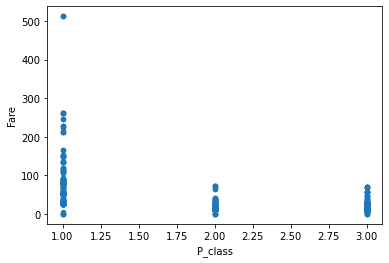

In [98]:
df.plot.scatter(x='P_class',y='Fare')

**Exercise: Output the rows which corresponds to passengers who where in P_class 3 and paid a fare amount above 50.000 ** 

In [107]:
df.loc[(df['P_class']==3) & (df['Fare']>50.000)]

,P_Id,Surv,P_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


** Exercise: How many passengers have the last name 'Andersson' ? **

In [114]:
df.loc[df['Name'].str.contains('Andersson')].count()
df.loc[df['Name'].str.contains('Andersson')]

,P_Id,Surv,P_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
